# LGMVIP - DataScience Intern, April-2022
### Author : Pavan Wanjari

### Task 1  :-  Intermediate level
#### Exploratory Data Analysis on Dataset - Terrorism 

As a security/defense analyst, try to find out the hot zone of terrorism.

#### Dataset: https://bit.ly/2TK5Xn5



### Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


###  Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape  #Check shape of data

(181691, 135)

In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#Rename columns
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City',
                  'attacktype1_txt': 'Attacktype', 'targtype1_txt': 'Targettype', 'gname': 'Group', 'weaptype1_txt':'Weapon', 'nkill':'Kill', 'nwound':'Wound' }, inplace = True)

In [7]:
#Select Useful columns
data = df[['Year', 'Month','Day','Country','State','Region','City','latitude','longitude','Attacktype','Kill','Wound','target1',
          'summary','Group', 'Targettype', 'Weapon', 'motive']]

In [8]:
# check top 5 data
data.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attacktype,Kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
# check shape of new data
data.shape

(181691, 18)

In [10]:
# Check details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [11]:
# check null values
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
Kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

Here we can see Null values present in Dataset

* Now replace null values

In [12]:
# replace null values
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [13]:
# check Statistical data by the use of describe function
data.describe()

,Year,Month,Day,latitude,longitude,Kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [14]:
# check unique values
data.nunique()

Year              47
Month             13
Day               32
Country          205
State           2854
Region            12
City           36674
latitude       48322
longitude      48039
Attacktype         9
Kill             205
Wound            238
target1        86006
summary       112492
Group           3537
Targettype        22
Weapon            12
motive         14490
dtype: int64

## Exploratory data analysis (EDA)

### Data Visualization 

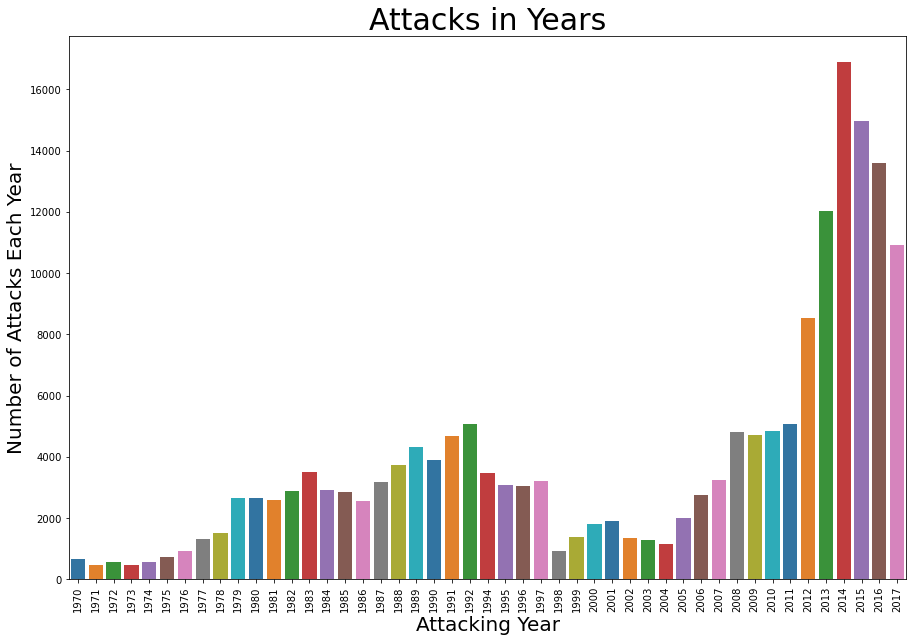

,Attacks
Year,
2011,5076
2012,8522
2013,12036
2014,16903
2015,14965
2016,13587
2017,10900


In [15]:
# Attacks in year
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize= (15, 10))
sns.barplot(x= year, y = years_count, palette= "tab10")

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks in Years', fontsize = 30)
plt.show()

attacks=data["Year"].value_counts(dropna=False).sort_index() 
attacks=pd.DataFrame(attacks).reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.tail(7)

* Above Graph shows **2012-2017** attack is more than other year. In year **2014** is very high attacks.
* There is tremendous growth in terrorist attacks after **2008**.

**Number of attacks in months by considering all the years.**

In [16]:
#Checking all the months
data["Month"].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
#Value counts of all the months
data["Month"].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [18]:
data[data["Month"]==0].index

Int64Index([    1,  1123,  1690,  2164,  2165,  2744,  3484,  3485,  4407,
             4408,  4409,  4410,  4411,  5726,  5727,  7252,  7253,  7254,
            15163, 26987],
           dtype='int64')

We have to drop **0**,  because there are very less amount of data.

In [19]:
data.drop(index=data[data["Month"]==0].index, inplace=True)

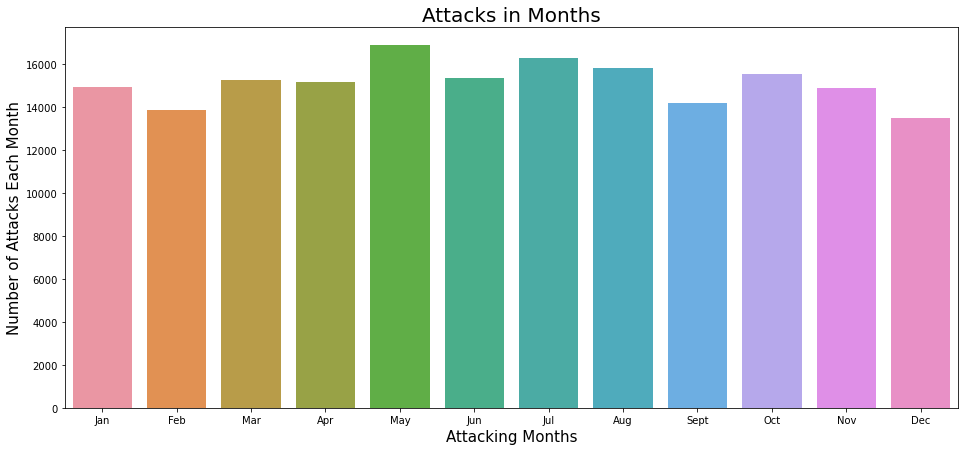

In [20]:
plt.figure(figsize=(16,7))
sns.countplot(x="Month",data=data)

positions = (0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.xticks(positions, labels, fontsize=10, rotation = 0)

plt.xlabel('Attacking Months', fontsize = 15)
plt.ylabel('Number of Attacks Each Month', fontsize = 15)
plt.title('Attacks in Months', fontsize = 20)
plt.show()

Above Bar plot shows most of the attacks in the Month of **May**.

* **Terrorist activities By Region every year**

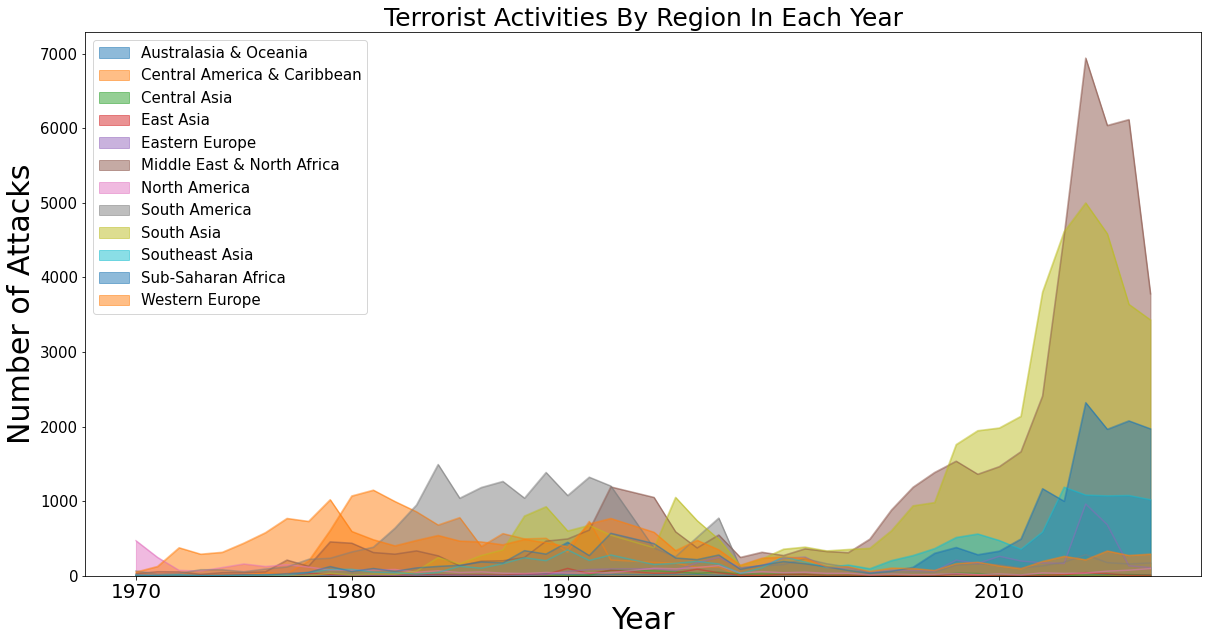

In [21]:

pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.legend(loc='upper left', fontsize=15)
plt.show()

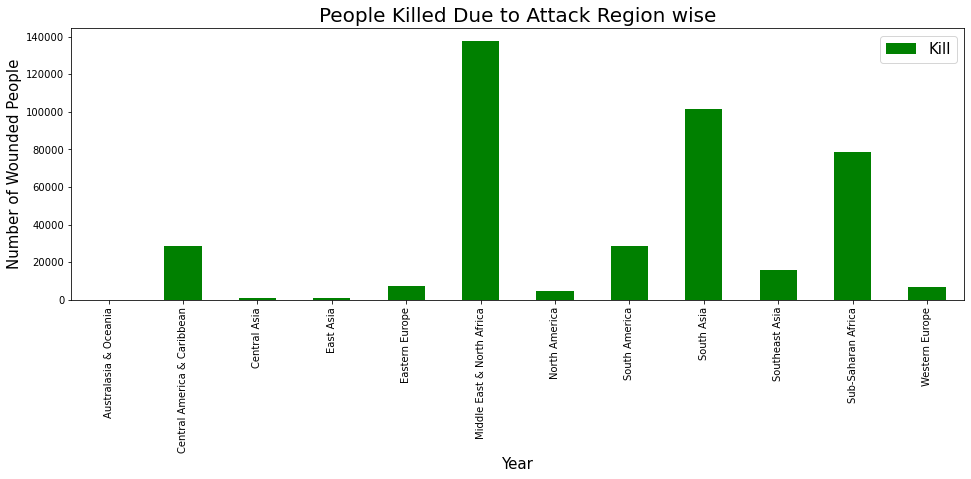

Region
Australasia & Oceania             150.0
Central America & Caribbean     28708.0
Central Asia                     1000.0
East Asia                        1149.0
Eastern Europe                   7415.0
Middle East & North Africa     137642.0
North America                    4916.0
South America                   28849.0
South Asia                     101319.0
Southeast Asia                  15637.0
Sub-Saharan Africa              78386.0
Western Europe                   6694.0
Name: Kill, dtype: float64

In [22]:

Kill_region=(data.groupby("Region").sum()["Kill"])
Kill_region

#Plotting 
plt.figure(figsize=(16,5))
Kill_region.plot(kind="bar", color="g")

plt.title('People Killed Due to Attack Region wise', fontsize = 20)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Wounded People', fontsize = 15)
plt.legend(loc=0, fontsize=15)
plt.show()

Kill_region

From above graph shows the **Middle East & North Africa** Region has more attacks.

In [23]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14367
Afghanistan       12731
India             11960
Colombia           8304
Philippines        6906
Peru               6096
El Salvador        5319
United Kingdom     5235
Turkey             4290
Name: Country, dtype: int64

In [24]:
data.Group.value_counts()[1:10]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2771
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

* **Finding Number of Attack country wise**

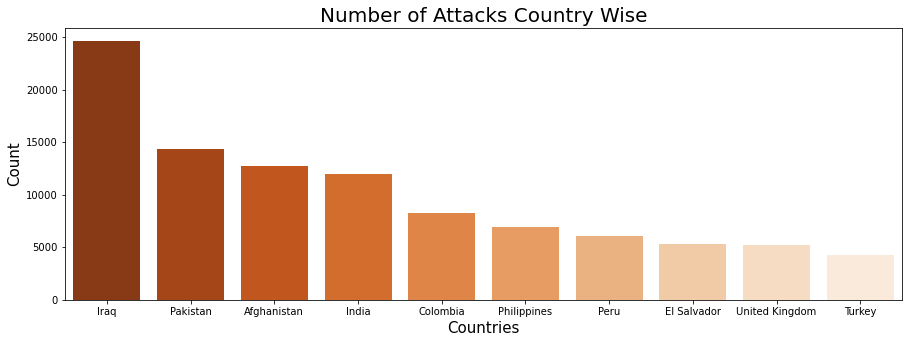

In [25]:

plt.figure(figsize= (15,5))

sns.barplot(attack.index,attack, palette= "Oranges_r" )
plt.title('Number of Attacks Country Wise', fontsize = 20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

From above Data and Plot shows Country **Iraq** has more Attacks.

* **Finding people died due to attack every year**

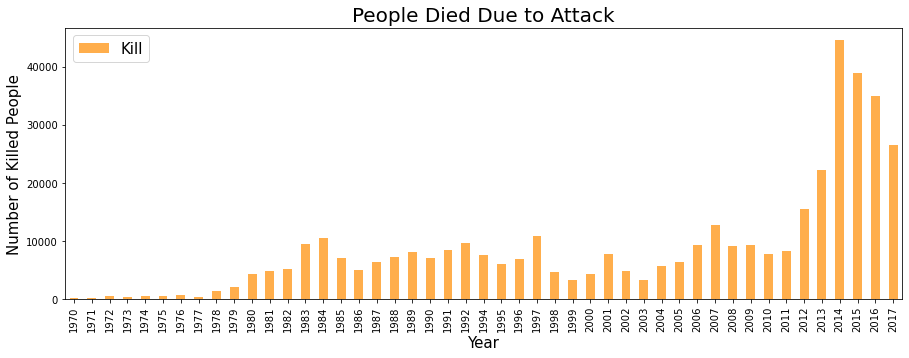

In [26]:

df = data[['Year', 'Kill']].groupby(['Year']).sum()

#plot
df.plot(kind= 'bar',alpha=0.7,color='DarkOrange', figsize= (15,5))
plt.title('People Died Due to Attack', fontsize = 20)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Killed People', fontsize = 15)
plt.legend(loc='upper left', fontsize=15)
plt.show()


In **Year 2014** higher number of people is **Died**.  

* **Finding Attack Different type of Areas**

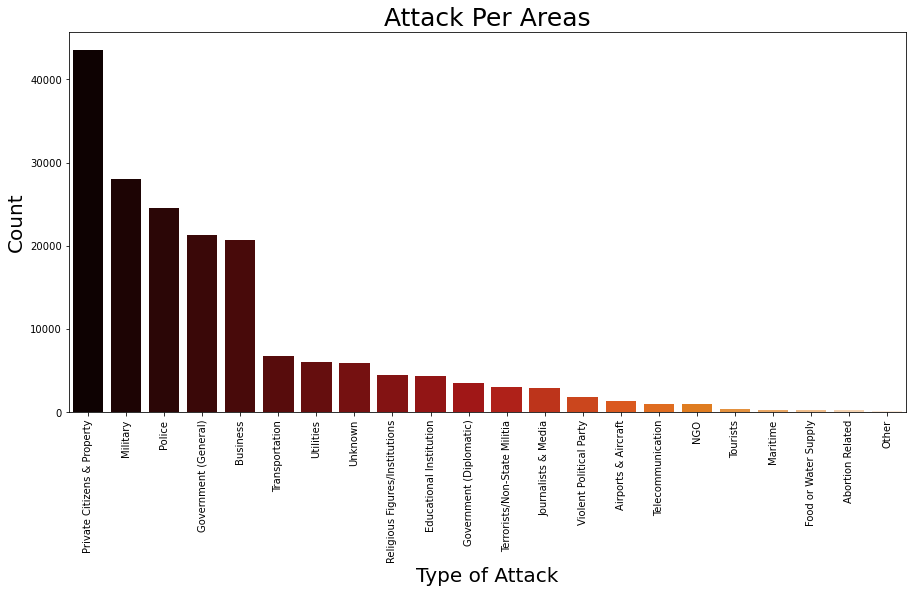

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(data.Targettype, order= data.Targettype.value_counts().index, palette="gist_heat")

plt.xticks(rotation= 90)
plt.xlabel('Type of Attack', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.title('Attack Per Areas', fontsize= 25)

plt.show()

Above plot shows Attacks on **Privet Citizens & Property** is high.

* **Finding Number of people Wounded**

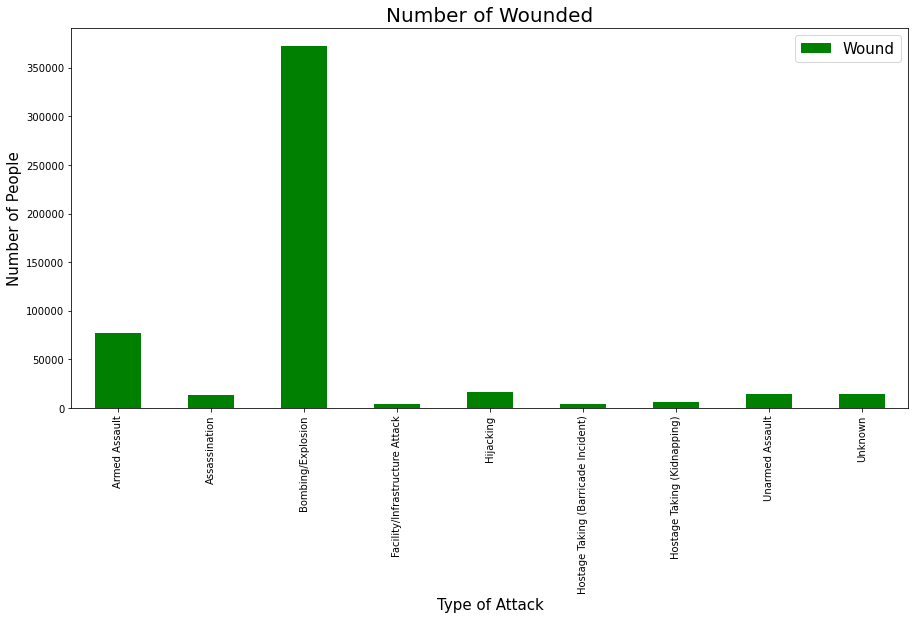

In [28]:
data[["Attacktype","Wound"]].groupby(["Attacktype"], axis=0).sum().plot(kind='bar', figsize=(15,7), color=['green'])

plt.xlabel('Type of Attack', fontsize= 15)
plt.ylabel('Number of People', fontsize= 15)
plt.title('Number of Wounded', fontsize= 20)
plt.legend( fontsize=15)

plt.show()

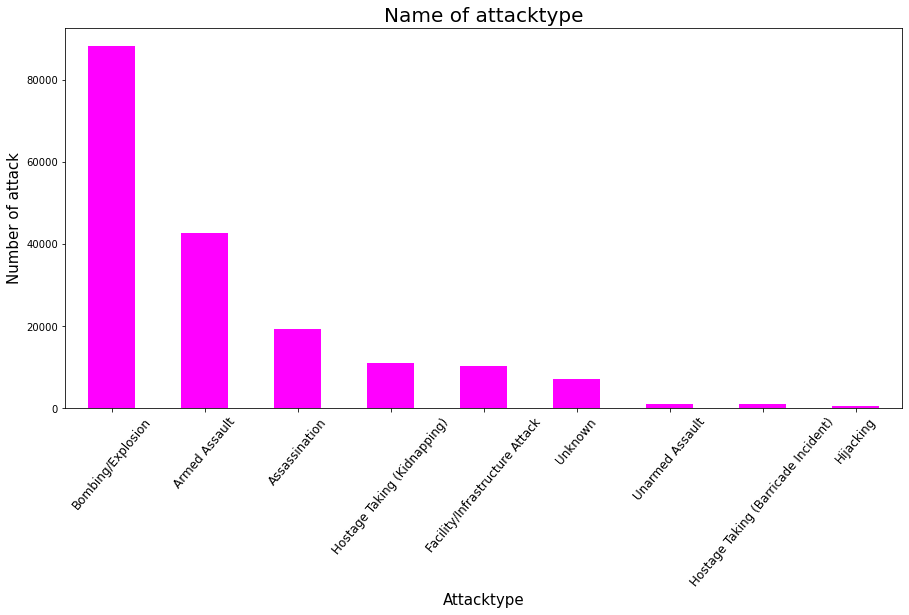

In [29]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(15,7),color='magenta')
plt.xticks(rotation = 50, fontsize =12)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

From above plot we can see the Most attack types is **Bombing/Explosion**

* **Check Top city affected By Pie chart**

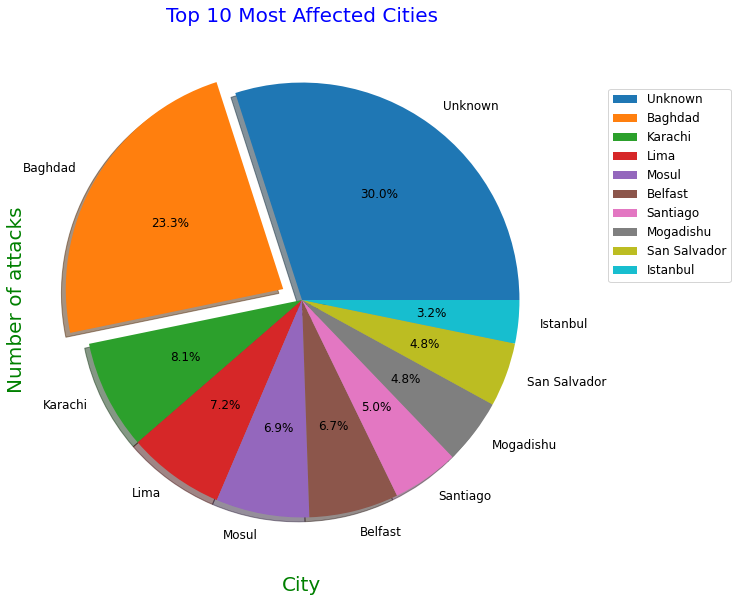

In [30]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
data['City'].value_counts().to_frame().sort_values('City', axis=0, ascending= False).head(10).plot(kind= 'pie',
                                                subplots=True, explode = explode,figsize=(10,10), shadow=True, 
                                                textprops={'fontsize':12,'weight':'light','color':'k'},
                                                autopct='%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('City', fontsize=20, c='g')
plt.ylabel('Number of attacks', fontsize= 20, c= 'g')
plt.title('Top 10 Most Affected Cities', fontsize= 20, color= 'b')
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)  #location of legend
plt.show()

 **Baghdad** is most affected City from Terror attacks.

* **Top 10 Terrorist Group as per attack Count**

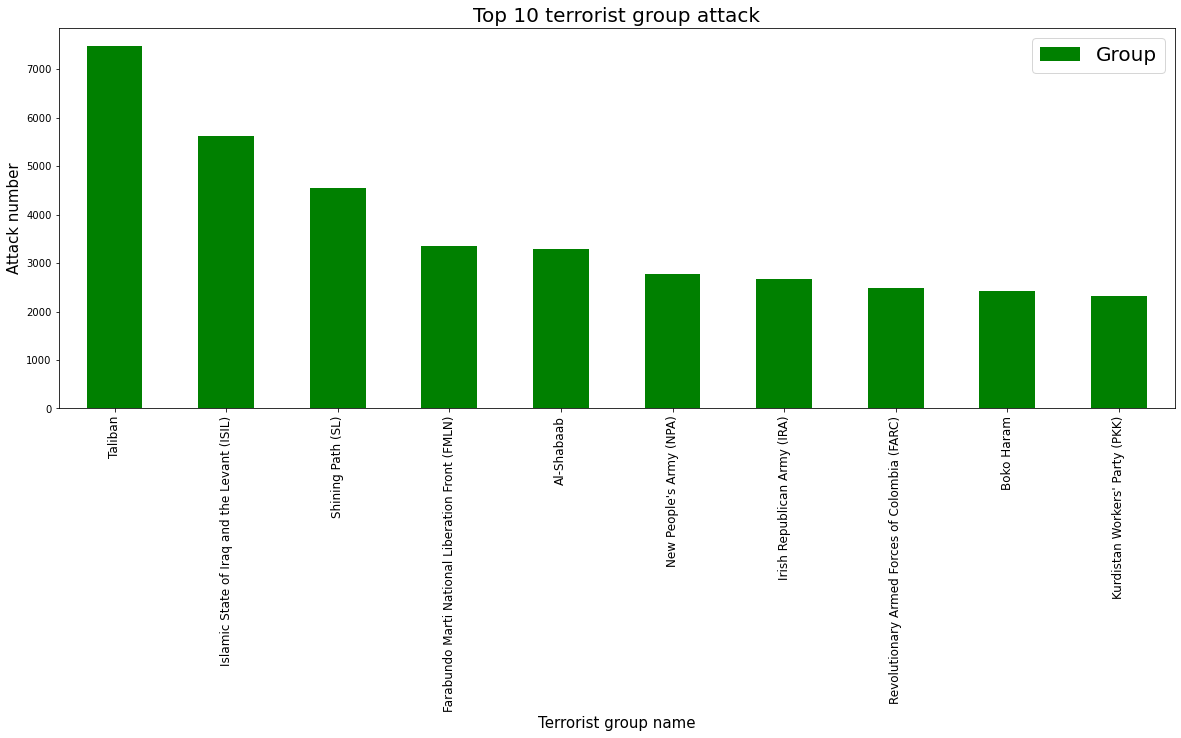

In [31]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,7))

plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(fontsize= 12)
plt.legend(fontsize =20)
plt.show()

**Taliban** Terrorist group has highest number of attacks. 

* **Top 10 Terrorist groups as per Kills**

In [32]:
df= data[['Group', 'Country','Kill']]
df=df.groupby(["Group","Country"], axis= 0).sum().sort_values('Kill', ascending= False).drop('Unknown').reset_index().head(10)
data['Group'].value_counts().to_frame().drop('Unknown').head(10)
df

,Group,Country,Kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


* **Top 10 terrorist group attacks by kills**

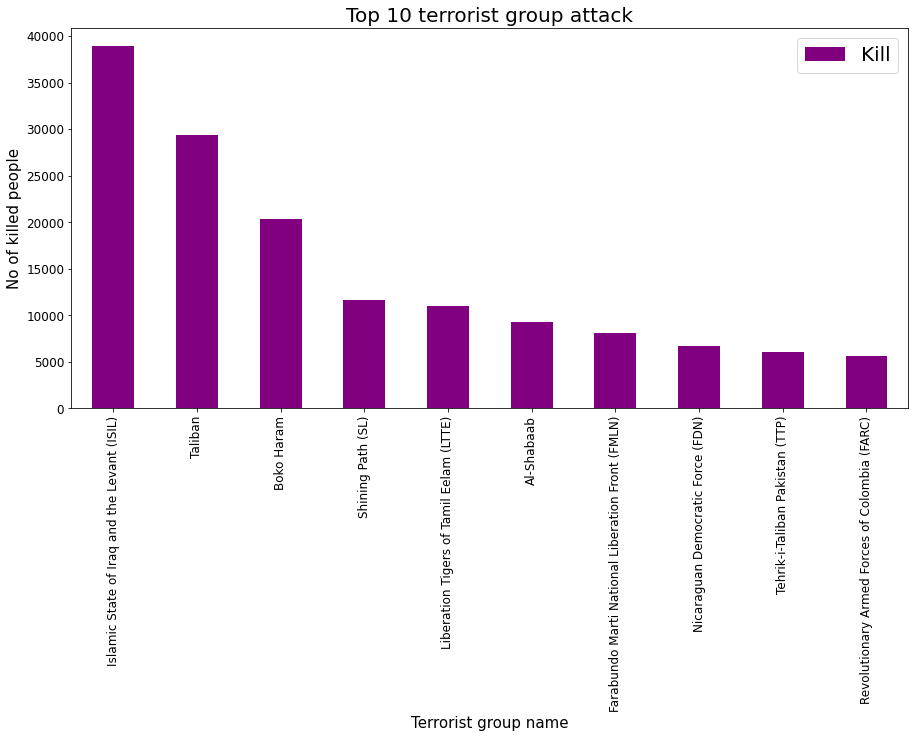

In [33]:
data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',
                                ascending=False).head(10).plot(kind='bar',color='Purple',figsize=(15,7))


plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.legend(fontsize =20)

plt.show()

From above Data and plot shows the Top 1 Terrorist Group by Number of kills is  **Islamic State of Iraq and the Levant (ISIL)** and 2nd is **Taliban**.

* **Number of peoples lost there lives**

In [34]:
kill= data.loc[:,'Kill']
print('Number of People Killed by terror attack: ', int(sum(kill.dropna())))

Number of People Killed by terror attack:  411865


* **Number of kill as per Attack type**


In [35]:
typekill = data.pivot_table(columns="Attacktype", values ='Kill', aggfunc='sum')
typekill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32378.0


In [36]:
# Number of kill country wise
countrykill = data.pivot_table(columns="Country", values ='Kill', aggfunc='sum')
countrykill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Observation and Results

* Country with most attack  :   **Iraq**

* City with most attack     :   **Baghdad**

* Region with most attack   :   **Middle East and North Africa**

* Year with most attack     :   **2014**

* Month with most attack    :   **May**

* Group with most attack    :   **Taliban**

* Most attack types         :   **Bombing/Explosion**

## Thank You !